In [2]:
import numpy as np
import math
from matplotlib import pyplot as plt
from numpy import linalg as LA

Будем использовать следующую разностную схему:
$$
\frac{y_{n+1} - 2y_{n} +y_{n-1}}{2h} + (10 + x_n^2)y_n = xe^{-x}\\
Однородное:\\
y_1(0) = 1 \ y_1'(1) = 0\\
y_2(0) = 0 \ y_2'(1) = 1\\
Неоднородное:\\
y_0(0) = 0\ y_0'(1) = 0 \\
$$

Для производной на правом краю будем пользоваться:
$$
y_N' = \frac{3y_N-4y_{N-1} + y_{N-2}}{2h}
$$

In [3]:
def GenMatrix(N,h,x):
    A = np.zeros((N,N))
    A[0][0] = 1
    for i in range(1,N-1):
        A[i][i-1] = 1/(2*(h**2))
        A[i][i] =  (-1/(h**2))+ (10 + (x[i]**2))
        A[i][i+1] = 1/(2*(h**2))
    A[N-1][N-3] = 1/(2*h)
    A[N-1][N-2] = -2/h
    A[N-1][N-1] = 3/(2*h)
    return A

In [4]:
def f(x):
    return x*(math.e**(-x))

In [5]:
def GenVecNoHom(N,a,b,x):
    F = np.zeros(N)
    F[0] = a
    for i in range(1,N-1):
        F[i] = f(x[i])
    F[N-1] = b
    return F

In [6]:
def GenVecHom(N,a,b,x):
    F = np.zeros(N)
    F[0] = a
    F[N-1] = b
    return F

In [7]:
N = 3000
h = 10/(N-1)
x = np.arange(0,10+h,h)

In [8]:
A = GenMatrix(N,h,x)

In [9]:
a = 0
b = 1
F = GenVecHom(N,a,b,x)
y_1 = np.linalg.solve(A,F)

(0, 10)

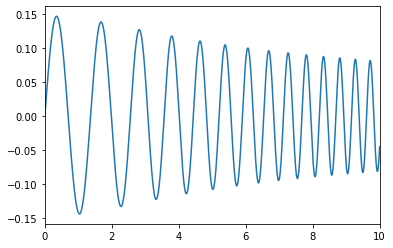

In [10]:
plt.plot(x,y_1)
plt.xlim(0,10)

In [11]:
a = 1
b = 0
F = GenVecHom(N,a,b,x)
y_2 = np.linalg.solve(A,F)

(0, 10)

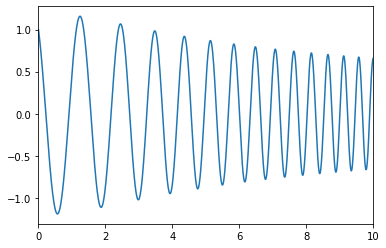

In [12]:
plt.plot(x,y_2)
plt.xlim(0,10)

In [13]:
a = 0
b = 0
F = GenVecNoHom(N,a,b,x)
y_0 = np.linalg.solve(A,F)

(0, 10)

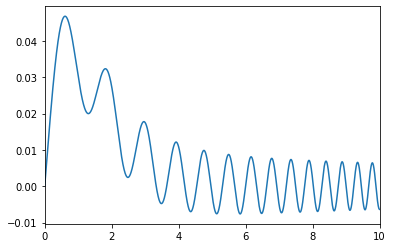

In [14]:
plt.plot(x,y_0)
plt.xlim(0,10)

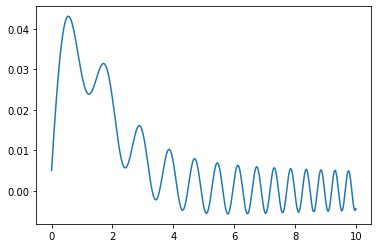

In [23]:
c_1 = 0.03
c_2 = 0.005
plt.plot(x,c_1*y_1+c_2*y_2+y_0)